In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import cufflinks as cf
import plotly
from sklearn.neighbors import KNeighborsClassifier
import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
import math
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import os
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics, linear_model
import warnings
warnings.filterwarnings('ignore')
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
import os
from sklearn.metrics import classification_report
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics, linear_model
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import average_precision_score, matthews_corrcoef
import warnings
from imblearn.over_sampling import SMOTE, ADASYN
warnings.filterwarnings('ignore')
import matplotlib
import sklearn
from IPython.display import HTML
#from IPython.display import YouTubeVideo
from sklearn.linear_model import LogisticRegression # Importing Classifier Step
import pickle
import os
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

# Import Data

Using the full dataset that is not split into train/val/test

In [2]:
print(os.getcwd())
relative_path = os.path.abspath(os.path.join(os.getcwd(), "../../"))
data = pd.read_csv(relative_path+'/preprocessed_data/non_split_dataset_OHE/total_subset.csv')
data = data.drop(['evil'],axis=1)
print(data.shape)

a:\Desktop\FYP Final Files\notebooks\Supervised_ML


(1141078, 14)


In [3]:
data.head(1)

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,System_Core,Amazon_AWS,Container_Virtualization,Maintenance_Package_Management,Security_Monitoring,Utility_Misc,sus
0,1,0,0,1,157,5,0,1,0,0,0,0,0,1


Dropping target feature

In [4]:
X = data.drop(['sus'],axis=1)
y = data['sus']

Quick look at the data

In [5]:
X.head(5)

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,System_Core,Amazon_AWS,Container_Virtualization,Maintenance_Package_Management,Security_Monitoring,Utility_Misc
0,1,0,0,1,157,5,0,1,0,0,0,0,0
1,1,0,0,1,3,1,0,1,0,0,0,0,0
2,1,0,0,1,1010,0,0,1,0,0,0,0,0
3,1,1,0,0,21,2,2,0,0,0,0,0,1
4,1,1,0,0,1005,4,0,0,0,0,0,0,1


In [6]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: sus, dtype: int64

# Helper function that will assist in printing the metrics

In [7]:
def print_metrics(y_true, y_predicted):

    accuracy = accuracy_score(y_true, y_predicted)   
    metrics_results = precision_recall_fscore_support(y_true, y_predicted, average="weighted", pos_label=1)
    average_precision = average_precision_score(y_true, y_predicted)
    balanced_accuracy = balanced_accuracy_score(y_true, y_predicted)
    mcc = matthews_corrcoef(y_true, y_predicted)
    
    print(f'Accuracy:\t{accuracy:.3f}')
    print(f'Precision:\t{metrics_results[0]}')
    print(f'Recall:\t\t{metrics_results[1]:.3f}')
    print(f'F1-Score:\t{metrics_results[2]:.3f}')
    print("Average Precision Score:", average_precision)
    print("Balanced Accuracy Score:", balanced_accuracy)
    print("Matthews Correlation Coefficient (MCC):", mcc)
    print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_true , y_predicted)))
    
    # make confusion matrix
    confusion_matrixs = confusion_matrix(y_true, y_predicted)
    

    TP = confusion_matrixs[1][1]
    TN = confusion_matrixs[0][0]
    FP = confusion_matrixs[0][1]
    FN = confusion_matrixs[1][0]


    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrixs, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    print("True Positives (TP):", TP)
    print("True Negatives (TN):", TN)
    print("False Positives (FP):", FP)
    print("False Negatives (FN):", FN)

    # Print roc curve
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_predicted)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, )
    display.plot()
    plt.show()


    precision, recall, _ = precision_recall_curve(y_true, y_predicted)

    # Calculate the area under the curve
    pr_auc = auc(recall, precision)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

# Split the dataset into training and testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=0)

# Lets get a baseline score

### Logistic Regression

Define and fit model to training data

In [9]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

Predict on test data

In [10]:
y_pred = logistic_regression.predict(X_test)

Lets print the metrics

Accuracy:	0.993
Precision:	0.9926638560951856
Recall:		0.993
F1-Score:	0.993
Average Precision Score: 0.955826267071245
Balanced Accuracy Score: 0.9867743267934692
Matthews Correlation Coefficient (MCC): 0.9716311187575649
AUC : 0.98677


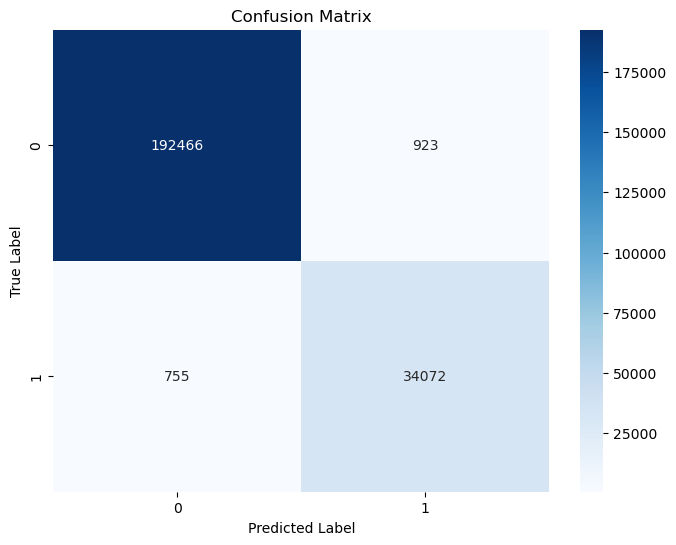

True Positives (TP): 34072
True Negatives (TN): 192466
False Positives (FP): 923
False Negatives (FN): 755


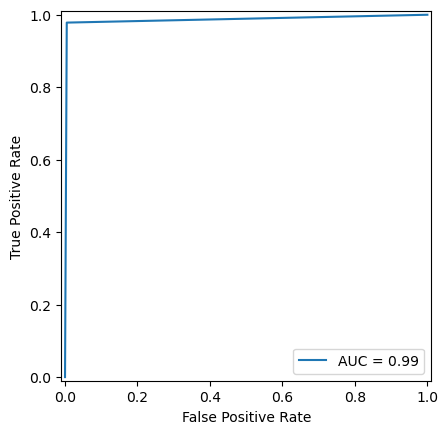

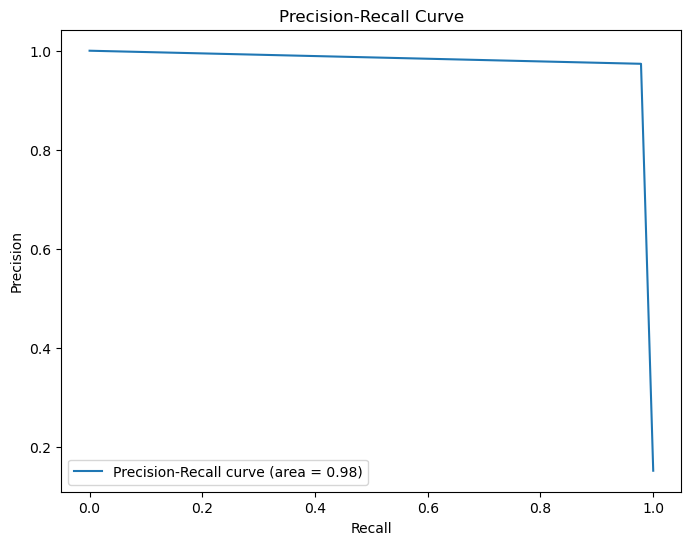

In [11]:
print_metrics(y_test,y_pred)

# Dealing with class imbalance
We are getting great scores but lets see if we can mess with the class imbalance and get an even better score

Splitting the data from the orignal set before any data manipulation

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

Lets see what our data looks like now

In [13]:
print(X_train.shape , "  X_train")
print(X_test.shape , "  X_test")
print(y_train.shape , "  y_train")
print(y_test.shape , "  y_test")

(912862, 13)   X_train
(228216, 13)   X_test
(912862,)   y_train
(228216,)   y_test


## Under Sampling

In [14]:
underSampler = RandomUnderSampler(random_state=0)
X_under_sampled_train , y_under_sampled_train = underSampler.fit_resample(X_train,y_train)

Lets see what our data looks like now

In [15]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_under_sampled_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
0    138687
1    138687
Name: count, dtype: int64


Train a logistic regression model on our undersampled data

In [16]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_under_sampled_train,y_under_sampled_train)

LogisticRegression()

In [17]:
# cv_predictions = cross_val_predict(logistic_regression, X_under_sampled_train, y_under_sampled_train, cv=5)
# # Calculate evaluation metrics
# cv_accuracy = accuracy_score(y_under_sampled_train, cv_predictions)
# cv_precision = precision_score(y_under_sampled_train, cv_predictions)
# cv_recall = recall_score(y_under_sampled_train, cv_predictions)
# cv_f1_score = f1_score(y_under_sampled_train, cv_predictions)

In [18]:
# # Print the cross-validation scores
# print("Cross-Validation Metrics:")
# print("Accuracy:", cv_accuracy)
# print("Precision:", cv_precision)
# print("Recall:", cv_recall)
# print("F1 Score:", cv_f1_score)

And predict on untouched test data

In [19]:
y_pred = logistic_regression.predict(X_test)

Accuracy:	0.992
Precision:	0.992506913119341
Recall:		0.992
F1-Score:	0.992
Average Precision Score: 0.9545187572653283
Balanced Accuracy Score: 0.9874805366557373
Matthews Correlation Coefficient (MCC): 0.971011580003309
AUC : 0.98748


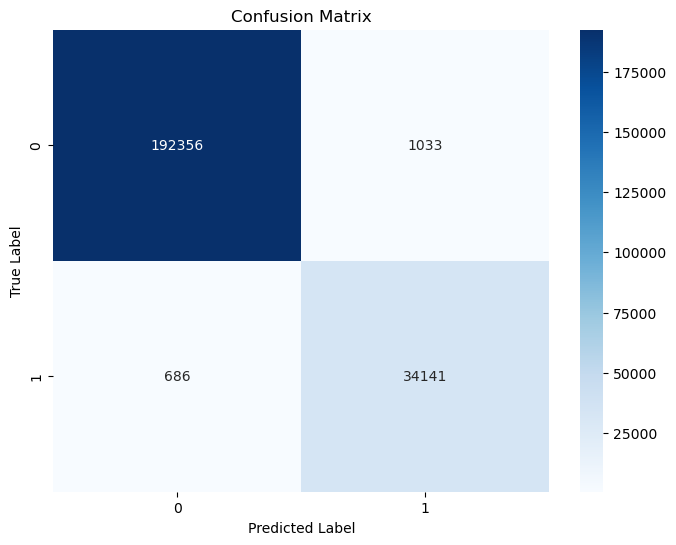

True Positives (TP): 34141
True Negatives (TN): 192356
False Positives (FP): 1033
False Negatives (FN): 686


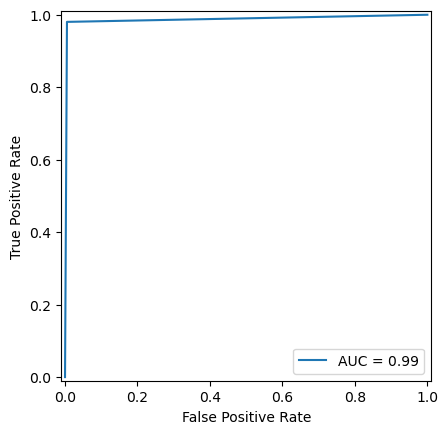

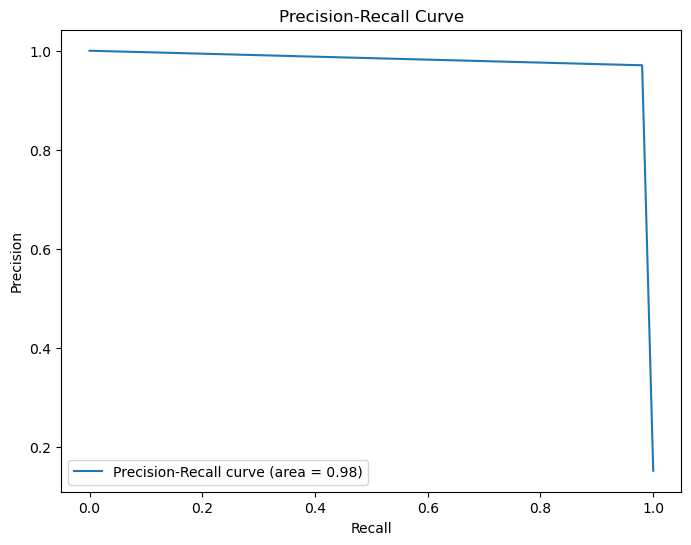

In [20]:
print_metrics(y_test,y_pred)

## Over Sampling

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [22]:
print(X_train.shape , "  X_train")
print(X_test.shape , "  X_test")
print(y_train.shape , "  y_train")
print(y_test.shape , "  y_test")

(912862, 13)   X_train
(228216, 13)   X_test
(912862,)   y_train
(228216,)   y_test


In [23]:
overSampler = RandomOverSampler(random_state=0)
X_over_sampled_train , y_over_sampled_train = overSampler.fit_resample(X_train,y_train)

In [24]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_over_sampled_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
0    774175
1    774175
Name: count, dtype: int64


Train a logistic regression model on our over sampled data

In [25]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_over_sampled_train, y_over_sampled_train)

y_pred = logistic_regression.predict(X_test)

Accuracy:	0.992
Precision:	0.992506913119341
Recall:		0.992
F1-Score:	0.992
Average Precision Score: 0.9545187572653283
Balanced Accuracy Score: 0.9874805366557373
Matthews Correlation Coefficient (MCC): 0.971011580003309
AUC : 0.98748


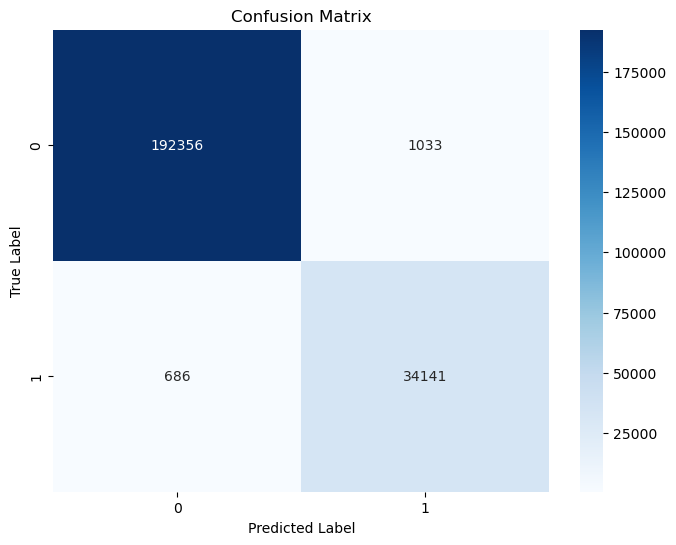

True Positives (TP): 34141
True Negatives (TN): 192356
False Positives (FP): 1033
False Negatives (FN): 686


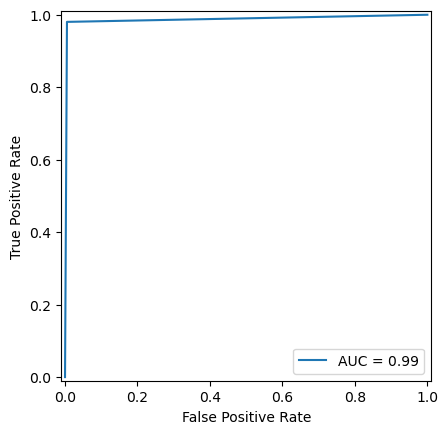

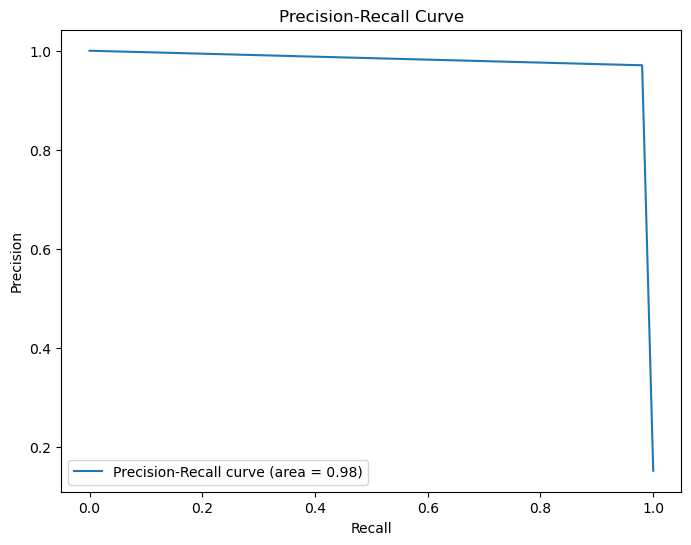

In [26]:
print_metrics(y_test,y_pred)

## Smote

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [28]:
print(X_train.shape , "  X_train")
print(X_test.shape , "  X_test")
print(y_train.shape , "  y_train")
print(y_test.shape , "  y_test")

(912862, 13)   X_train
(228216, 13)   X_test
(912862,)   y_train
(228216,)   y_test


In [29]:
smote_OS = SMOTE(random_state=0)
X_smote_train , y_smote_train = smote_OS.fit_resample(X_train,y_train)

In [30]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_smote_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
0    774175
1    774175
Name: count, dtype: int64


Train a logistic regression model on SMOTE modified data

In [31]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_smote_train, y_smote_train)

y_pred = logistic_regression.predict(X_test)

Accuracy:	0.992
Precision:	0.992506913119341
Recall:		0.992
F1-Score:	0.992
Average Precision Score: 0.9545187572653283
Balanced Accuracy Score: 0.9874805366557373
Matthews Correlation Coefficient (MCC): 0.971011580003309
AUC : 0.98748


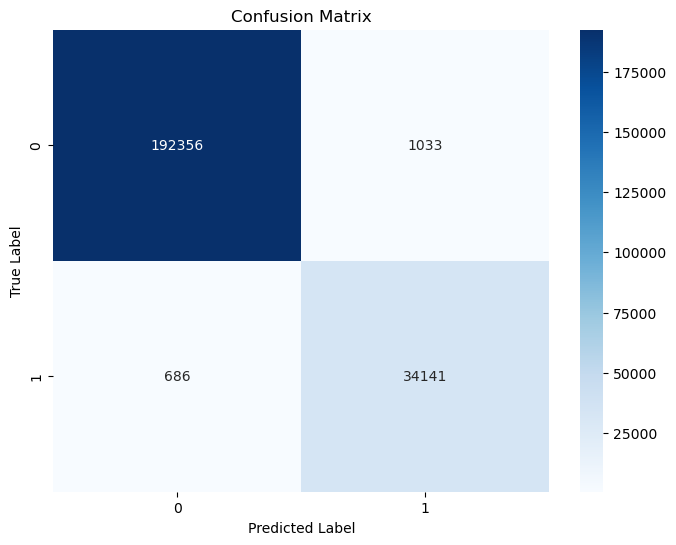

True Positives (TP): 34141
True Negatives (TN): 192356
False Positives (FP): 1033
False Negatives (FN): 686


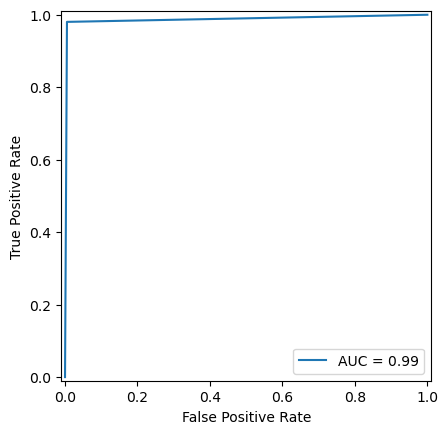

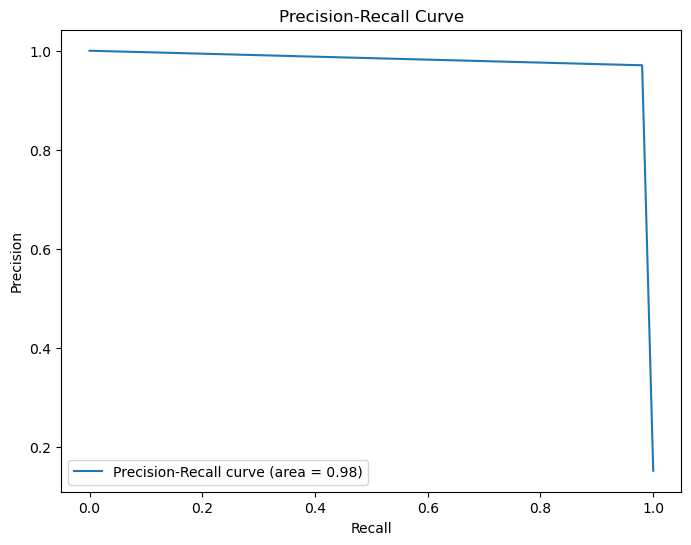

In [32]:
print_metrics(y_test,y_pred)

## Adasyn

In [33]:
adasyn = ADASYN(random_state=0)
X_adasyn_train , y_adasyn_train = adasyn.fit_resample(X_train,y_train)

In [34]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_adasyn_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
1    774201
0    774175
Name: count, dtype: int64


Train a logistic regression model on adasyn modified data

In [35]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_adasyn_train, y_adasyn_train)

y_pred = logistic_regression.predict(X_test)

Accuracy:	0.914
Precision:	0.9447220707111301
Recall:		0.914
F1-Score:	0.921
Average Precision Score: 0.6389741576284067
Balanced Accuracy Score: 0.948466456871254
Matthews Correlation Coefficient (MCC): 0.7573719230528233
AUC : 0.94847


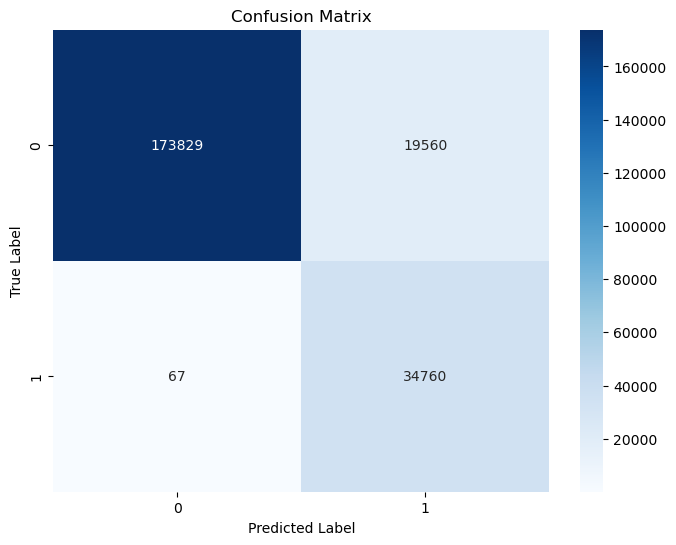

True Positives (TP): 34760
True Negatives (TN): 173829
False Positives (FP): 19560
False Negatives (FN): 67


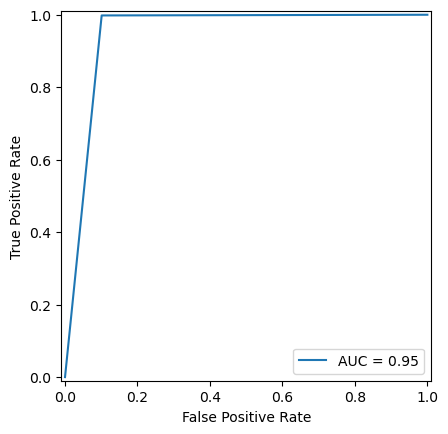

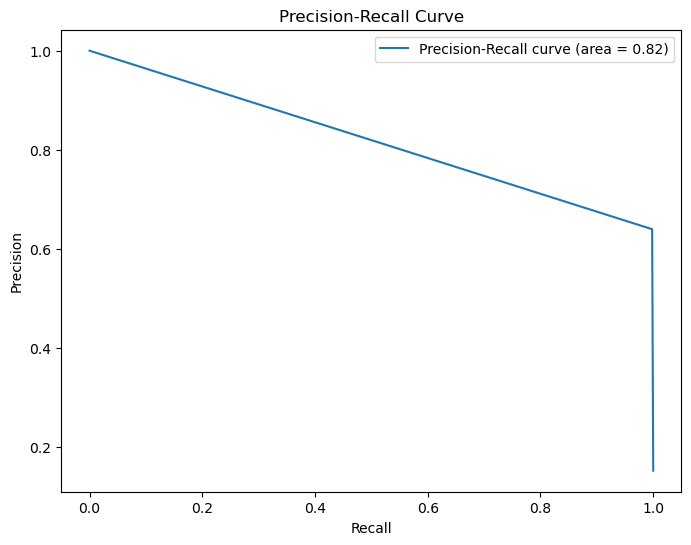

In [36]:
print_metrics(y_test,y_pred)

# Now that we have a baseline setup, lets try different models with the above data

- X_train, X_test - Original Data
- X_under_sampled_train , y_under_sampled_train - Under Sampled Data
- X_over_sampled_train , y_over_sampled_train - Over Sampled Data
- X_smote_train , y_smote_train - SMOTE modified Data
- X_adasyn_train , y_adasyn_train - ADASYN modified Data

## Decision Tree

In [37]:
# Declare Model
decision_tree = DecisionTreeClassifier(random_state=0)

### Original Data

Accuracy:	0.993
Precision:	0.9930307820001408
Recall:		0.993
F1-Score:	0.993
Average Precision Score: 0.9579979330706718
Balanced Accuracy Score: 0.987462354233407
Matthews Correlation Coefficient (MCC): 0.9730500044446491
AUC : 0.98746


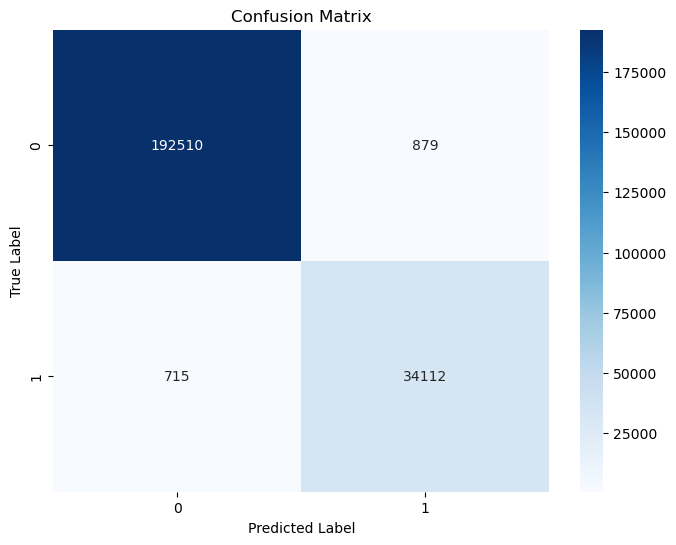

True Positives (TP): 34112
True Negatives (TN): 192510
False Positives (FP): 879
False Negatives (FN): 715


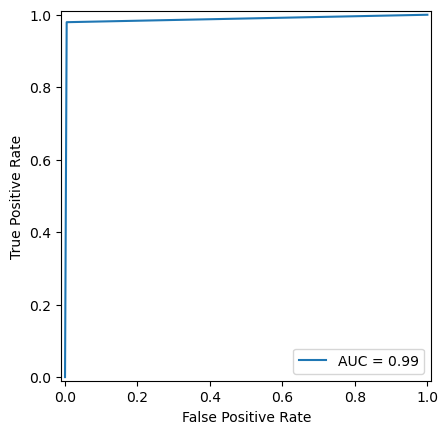

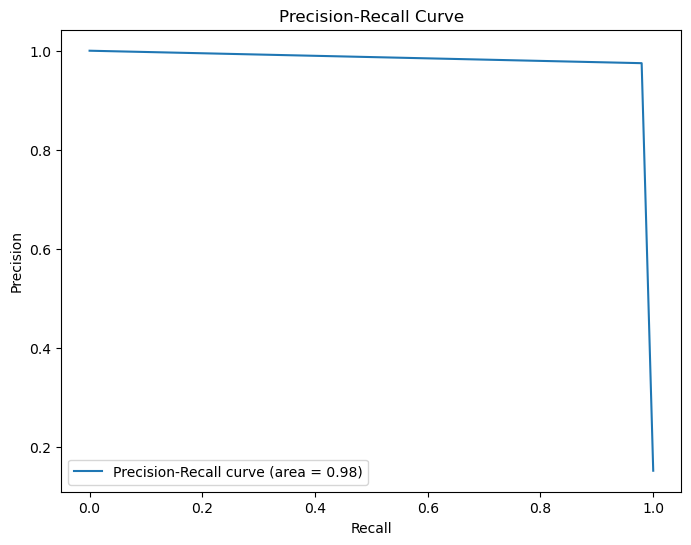

In [38]:
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### UnderSampled Data

Accuracy:	0.993
Precision:	0.9927328893247928
Recall:		0.993
F1-Score:	0.993
Average Precision Score: 0.9557258630873506
Balanced Accuracy Score: 0.9882336841647545
Matthews Correlation Coefficient (MCC): 0.9718795131855354
AUC : 0.98823


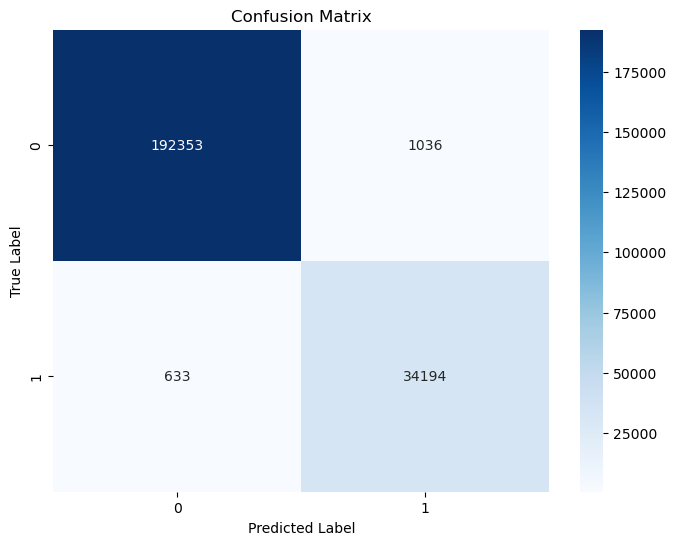

True Positives (TP): 34194
True Negatives (TN): 192353
False Positives (FP): 1036
False Negatives (FN): 633


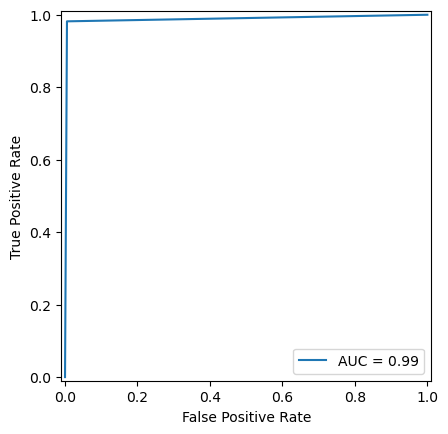

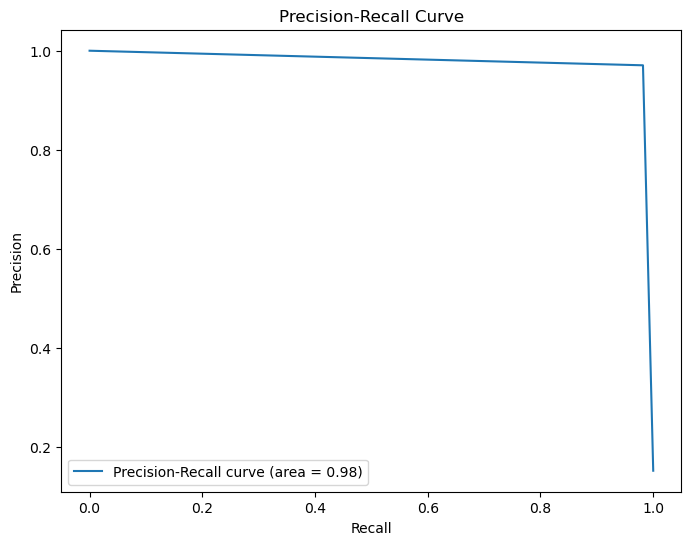

In [39]:
decision_tree.fit(X_under_sampled_train, y_under_sampled_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### OverSampled Data

Accuracy:	0.993
Precision:	0.9927663647106962
Recall:		0.993
F1-Score:	0.993
Average Precision Score: 0.9559450632307211
Balanced Accuracy Score: 0.988242596649619
Matthews Correlation Coefficient (MCC): 0.9720100366981834
AUC : 0.98824


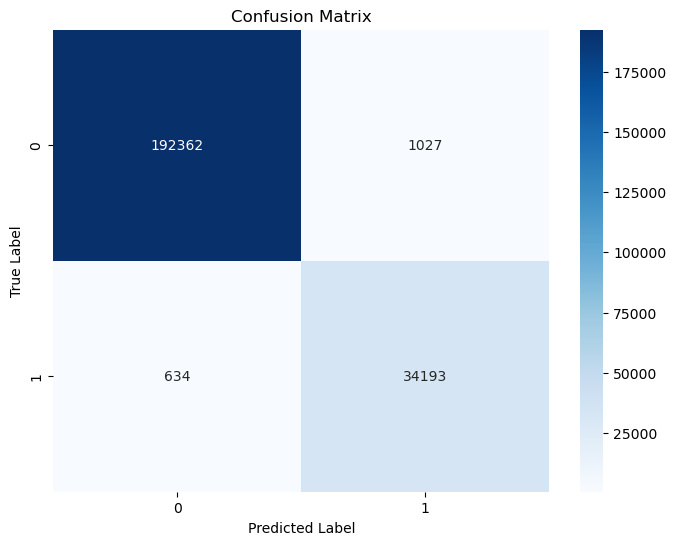

True Positives (TP): 34193
True Negatives (TN): 192362
False Positives (FP): 1027
False Negatives (FN): 634


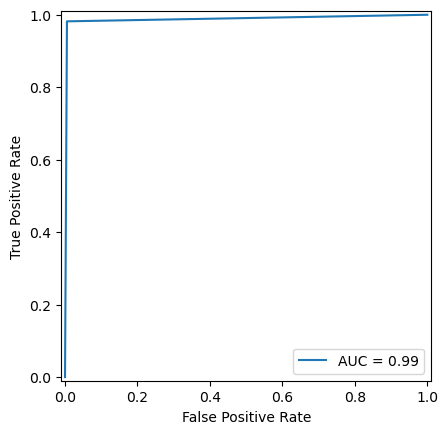

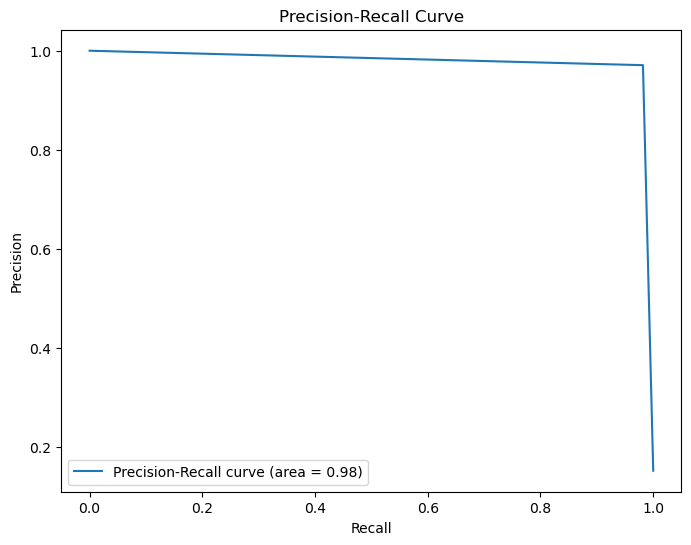

In [40]:
decision_tree.fit(X_over_sampled_train, y_over_sampled_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### SMOTE Data

Accuracy:	0.993
Precision:	0.9927829707341169
Recall:		0.993
F1-Score:	0.993
Average Precision Score: 0.956056091242174
Balanced Accuracy Score: 0.9882411672846367
Matthews Correlation Coefficient (MCC): 0.972074885961171
AUC : 0.98824


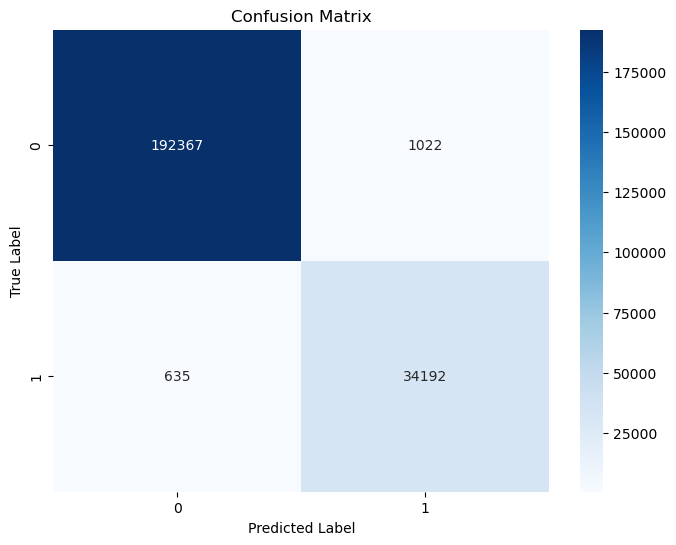

True Positives (TP): 34192
True Negatives (TN): 192367
False Positives (FP): 1022
False Negatives (FN): 635


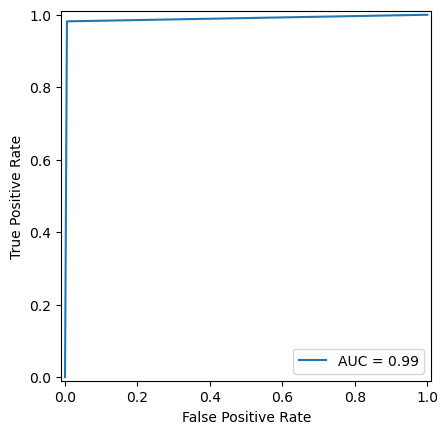

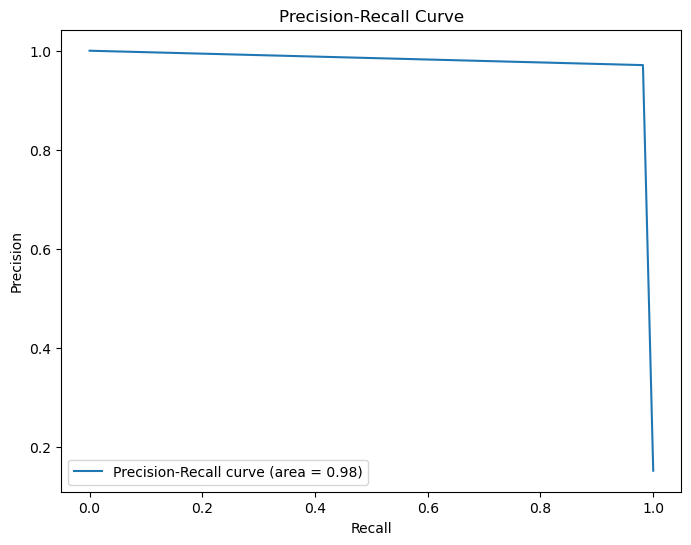

In [41]:
decision_tree.fit(X_smote_train, y_smote_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### ADASYN Data

Accuracy:	0.914
Precision:	0.9449059827258419
Recall:		0.914
F1-Score:	0.921
Average Precision Score: 0.6393725237258433
Balanced Accuracy Score: 0.948996161538556
Matthews Correlation Coefficient (MCC): 0.757835238084423
AUC : 0.94900


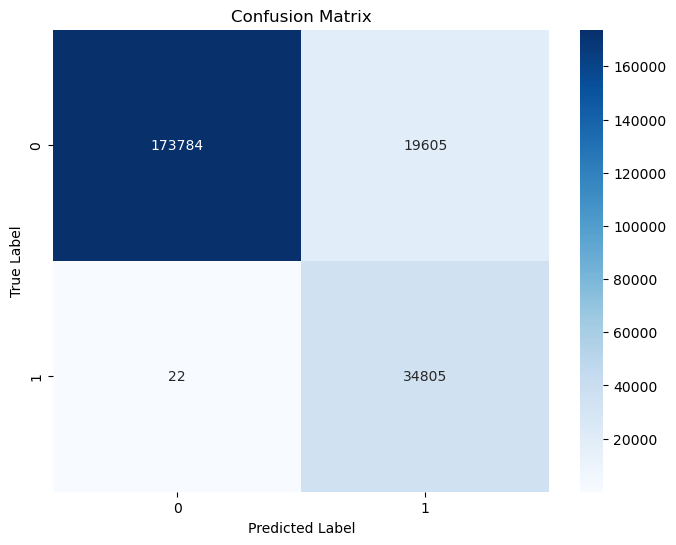

True Positives (TP): 34805
True Negatives (TN): 173784
False Positives (FP): 19605
False Negatives (FN): 22


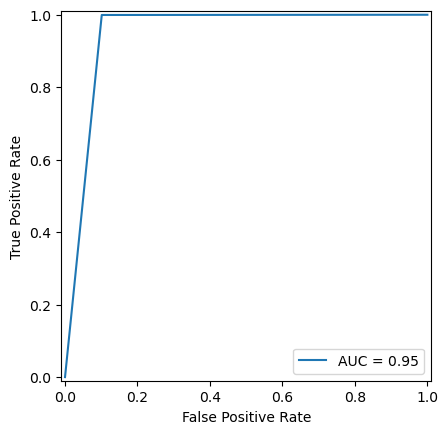

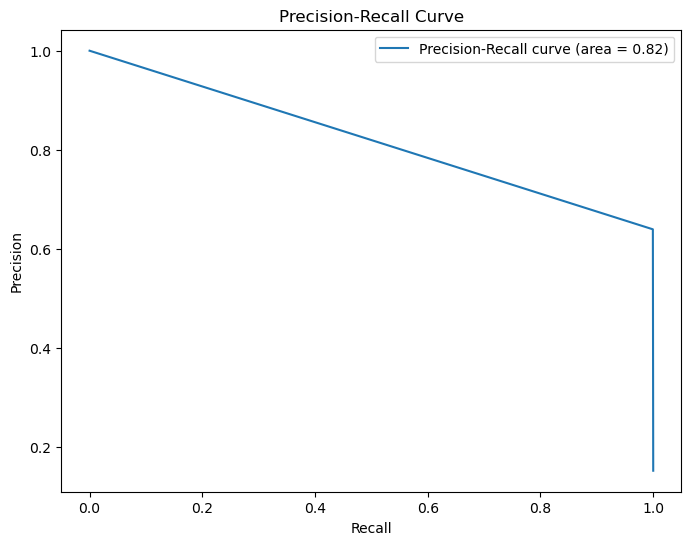

In [42]:
decision_tree.fit(X_adasyn_train, y_adasyn_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

## Random Forest

In [43]:
# Declare Random Forest Model
randomforest = RandomForestClassifier(random_state=0)

### Original Data

Accuracy:	0.993
Precision:	0.9930395288094441
Recall:		0.993
F1-Score:	0.993
Average Precision Score: 0.9580495361849702
Balanced Accuracy Score: 0.9874792963731592
Matthews Correlation Coefficient (MCC): 0.9730838235673323
AUC : 0.98748


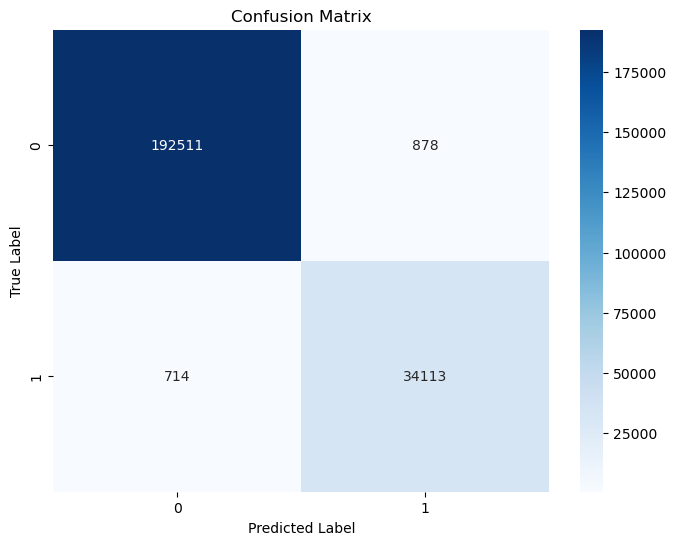

True Positives (TP): 34113
True Negatives (TN): 192511
False Positives (FP): 878
False Negatives (FN): 714


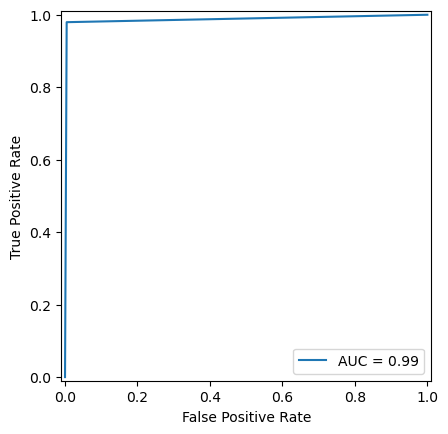

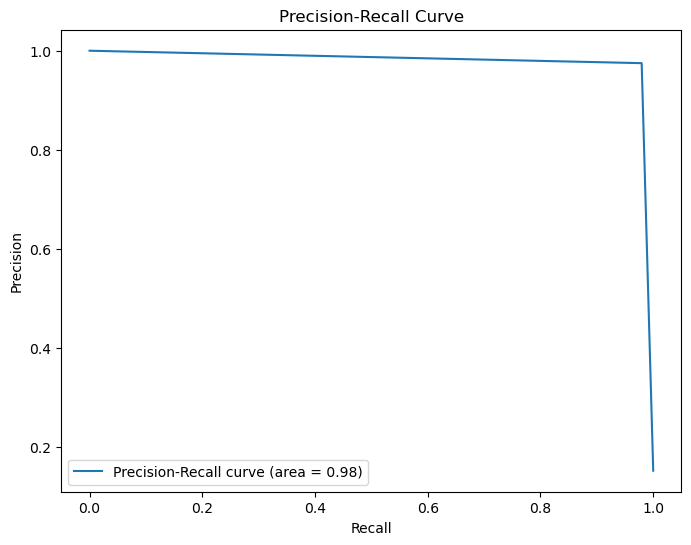

In [44]:
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### UnderSampled Data

Accuracy:	0.993
Precision:	0.9927542694861552
Recall:		0.993
F1-Score:	0.993
Average Precision Score: 0.9558583800765786
Balanced Accuracy Score: 0.9882583826918918
Matthews Correlation Coefficient (MCC): 0.971962508309717
AUC : 0.98826


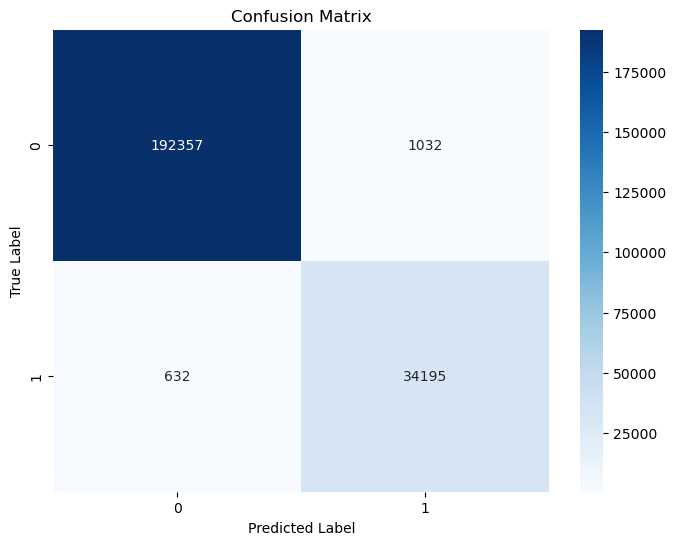

True Positives (TP): 34195
True Negatives (TN): 192357
False Positives (FP): 1032
False Negatives (FN): 632


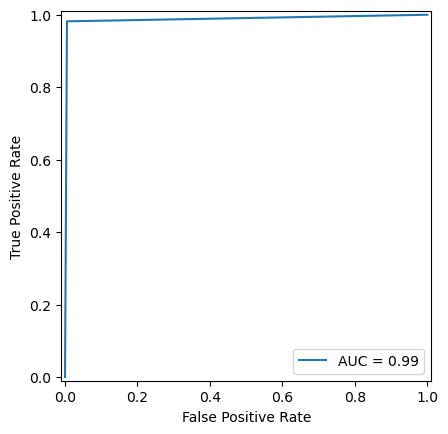

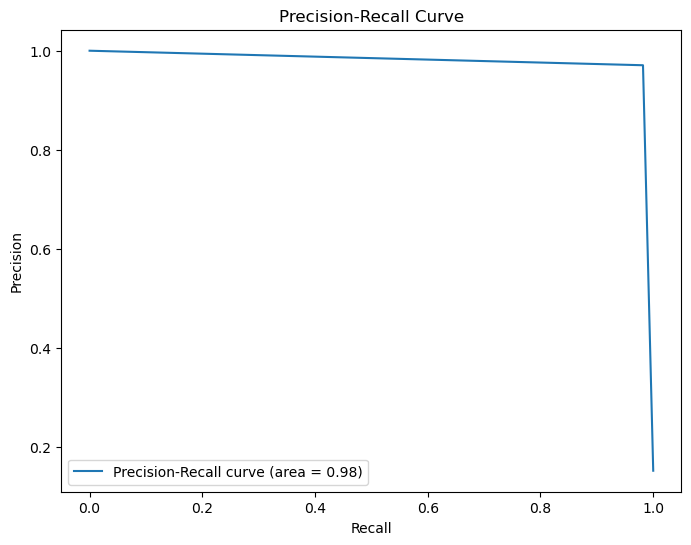

In [45]:
randomforest.fit(X_under_sampled_train, y_under_sampled_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### OverSampled Data

Accuracy:	0.993
Precision:	0.9927750883667017
Recall:		0.993
F1-Score:	0.993
Average Precision Score: 0.955996434403365
Balanced Accuracy Score: 0.9882595387893713
Matthews Correlation Coefficient (MCC): 0.9720437656886389
AUC : 0.98826


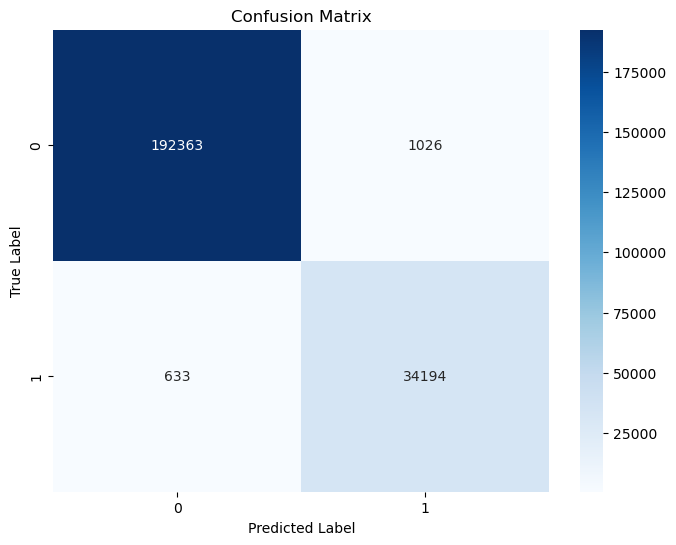

True Positives (TP): 34194
True Negatives (TN): 192363
False Positives (FP): 1026
False Negatives (FN): 633


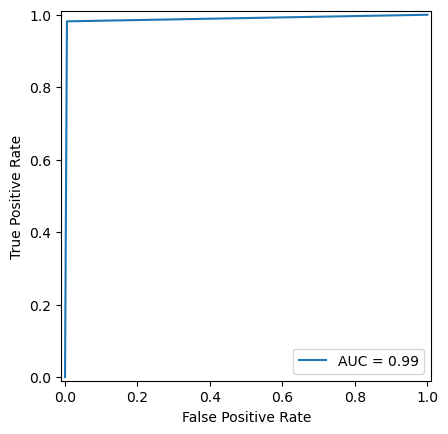

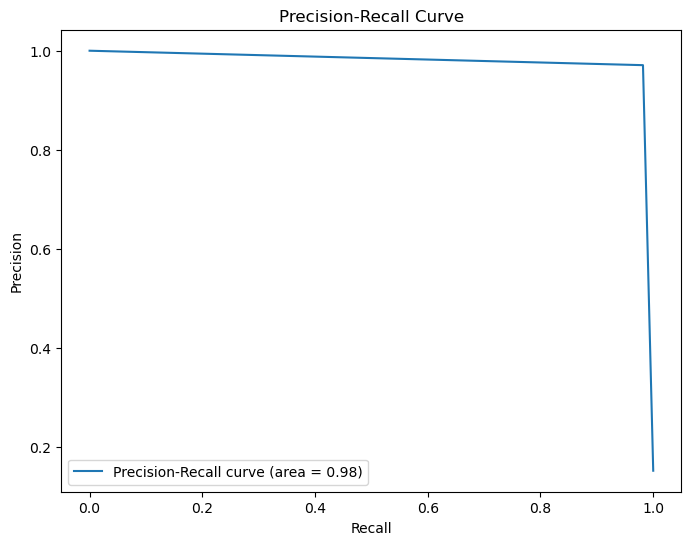

In [46]:
randomforest.fit(X_over_sampled_train, y_over_sampled_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### SMOTE Data

Accuracy:	0.993
Precision:	0.9927916949918962
Recall:		0.993
F1-Score:	0.993
Average Precision Score: 0.9561074702835975
Balanced Accuracy Score: 0.988258109424389
Matthews Correlation Coefficient (MCC): 0.9721086173006629
AUC : 0.98826


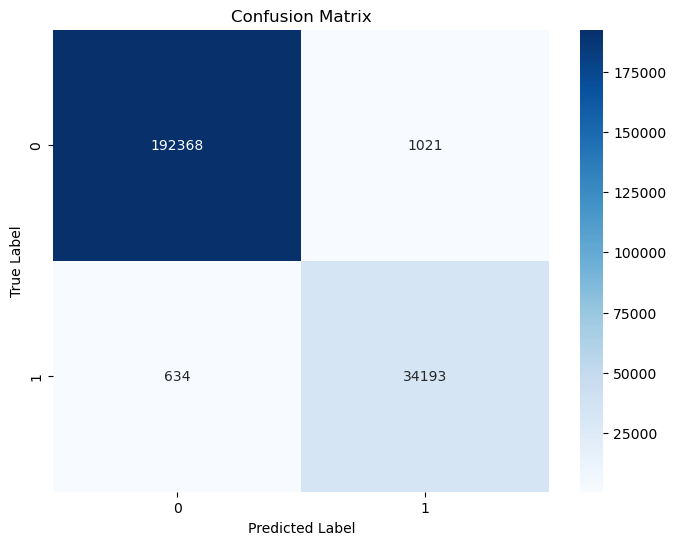

True Positives (TP): 34193
True Negatives (TN): 192368
False Positives (FP): 1021
False Negatives (FN): 634


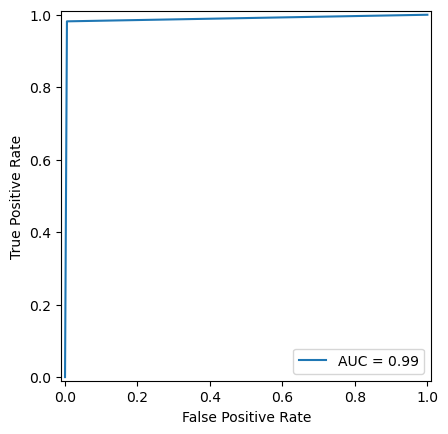

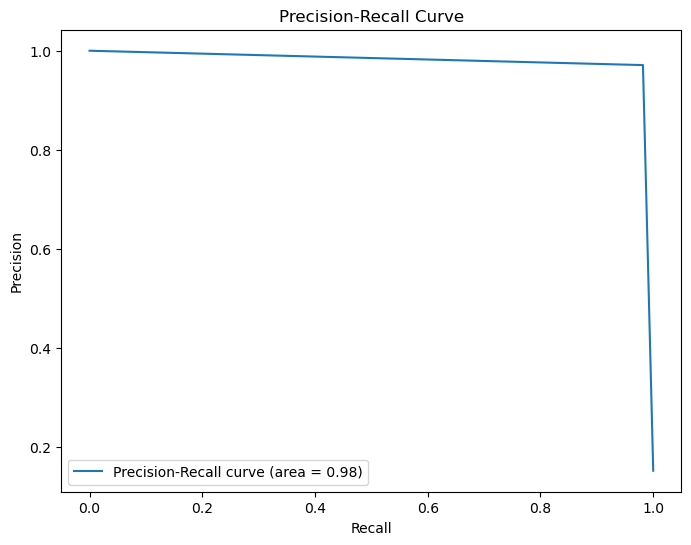

In [47]:
randomforest.fit(X_smote_train, y_smote_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### ADASYN Data

Accuracy:	0.914
Precision:	0.9449077775069995
Recall:		0.914
F1-Score:	0.921
Average Precision Score: 0.6393842731813346
Balanced Accuracy Score: 0.9489987470010177
Matthews Correlation Coefficient (MCC): 0.7578443860523347
AUC : 0.94900


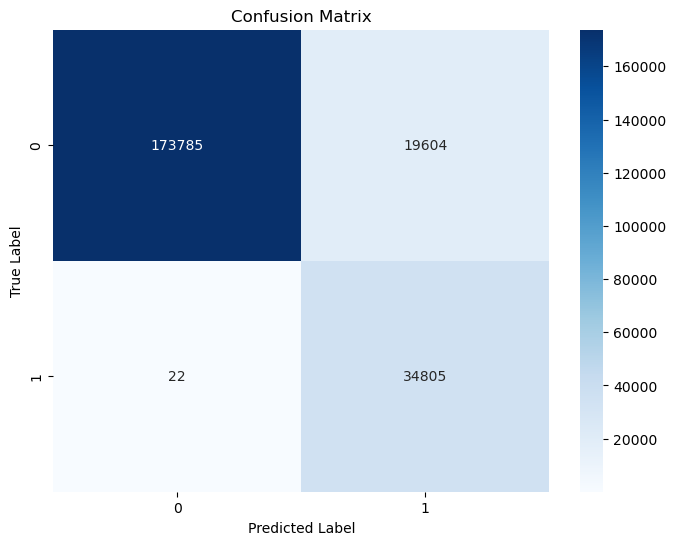

True Positives (TP): 34805
True Negatives (TN): 173785
False Positives (FP): 19604
False Negatives (FN): 22


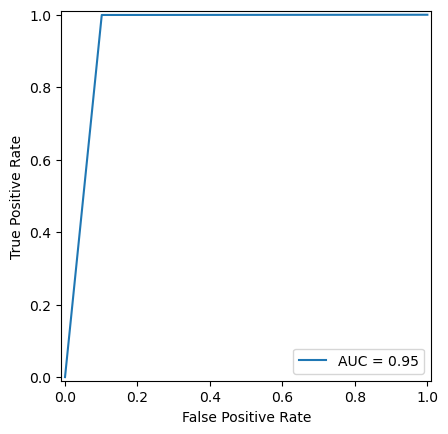

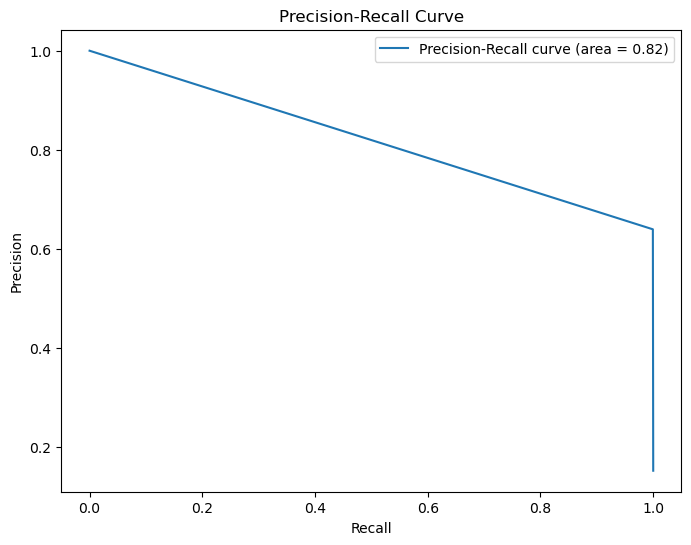

In [48]:
randomforest.fit(X_adasyn_train, y_adasyn_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

## KNN

In [49]:
# Declare KNN Model
knn = KNeighborsClassifier()

### Original Data

Accuracy:	0.993
Precision:	0.992945700417824
Recall:		0.993
F1-Score:	0.993
Average Precision Score: 0.9573666337325001
Balanced Accuracy Score: 0.9876434838182906
Matthews Correlation Coefficient (MCC): 0.9727177507101049
AUC : 0.98764


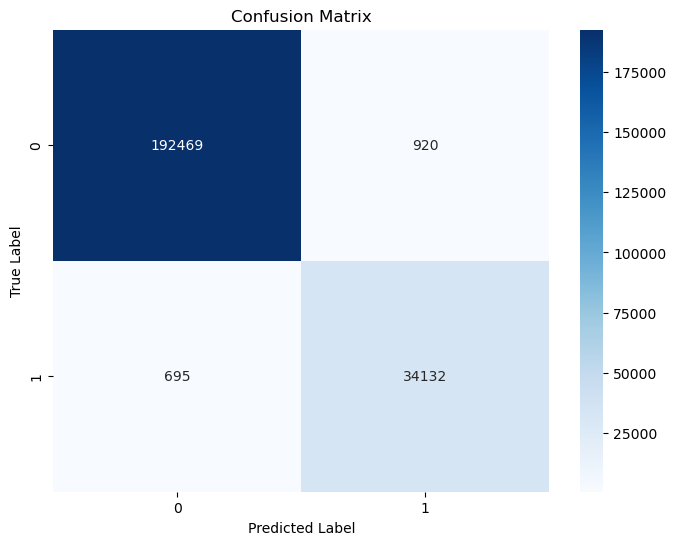

True Positives (TP): 34132
True Negatives (TN): 192469
False Positives (FP): 920
False Negatives (FN): 695


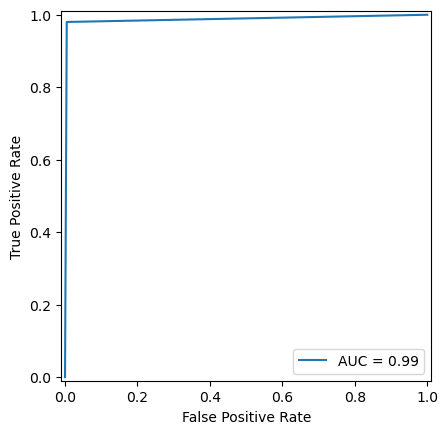

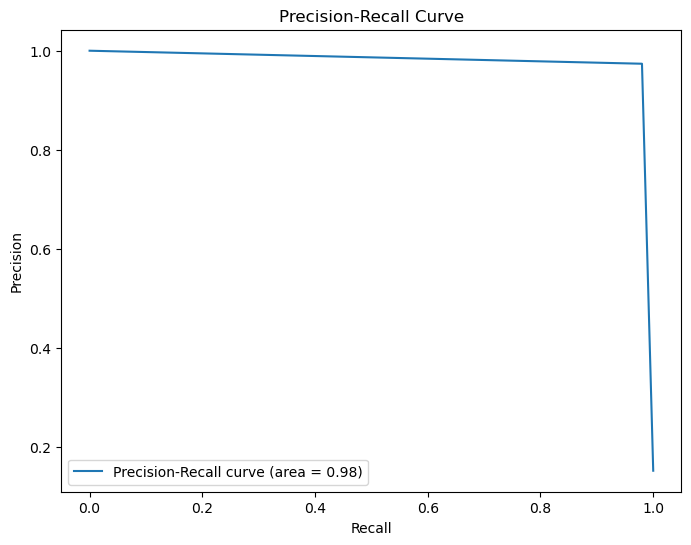

In [50]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### UnderSampled Data

Accuracy:	0.991
Precision:	0.9910968695040905
Recall:		0.991
F1-Score:	0.991
Average Precision Score: 0.9498599806325676
Balanced Accuracy Score: 0.9716032490942181
Matthews Correlation Coefficient (MCC): 0.9650639924034433
AUC : 0.97160


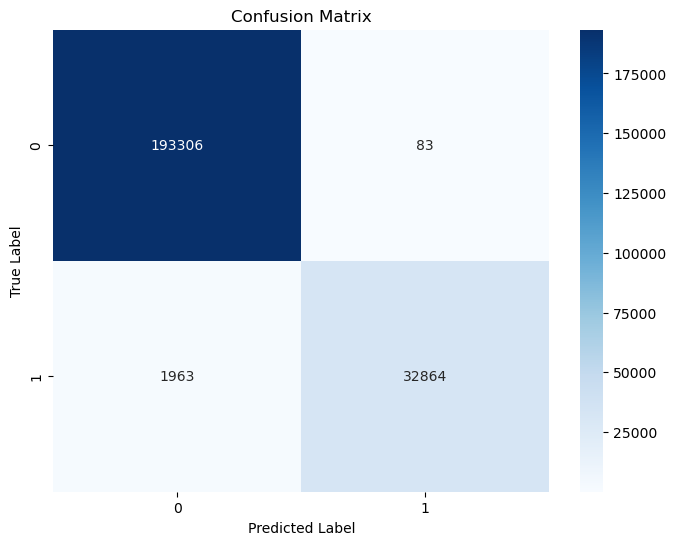

True Positives (TP): 32864
True Negatives (TN): 193306
False Positives (FP): 83
False Negatives (FN): 1963


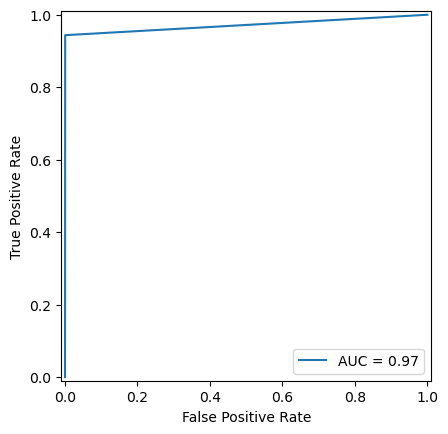

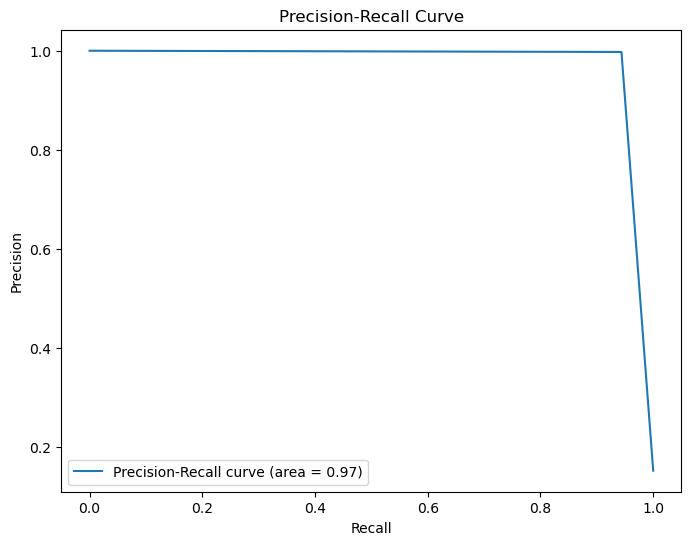

In [51]:
knn.fit(X_under_sampled_train, y_under_sampled_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### OverSampled Data

Accuracy:	0.993
Precision:	0.9929636423424241
Recall:		0.993
F1-Score:	0.993
Average Precision Score: 0.9574638807835697
Balanced Accuracy Score: 0.987700910527453
Matthews Correlation Coefficient (MCC): 0.9727868705563264
AUC : 0.98770


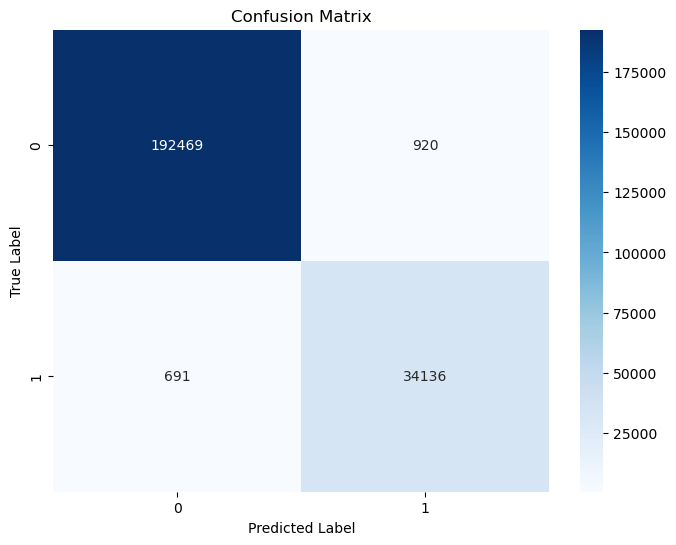

True Positives (TP): 34136
True Negatives (TN): 192469
False Positives (FP): 920
False Negatives (FN): 691


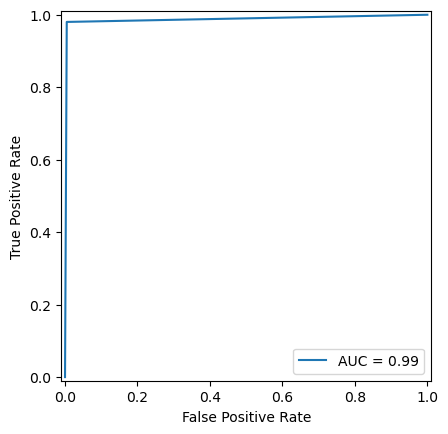

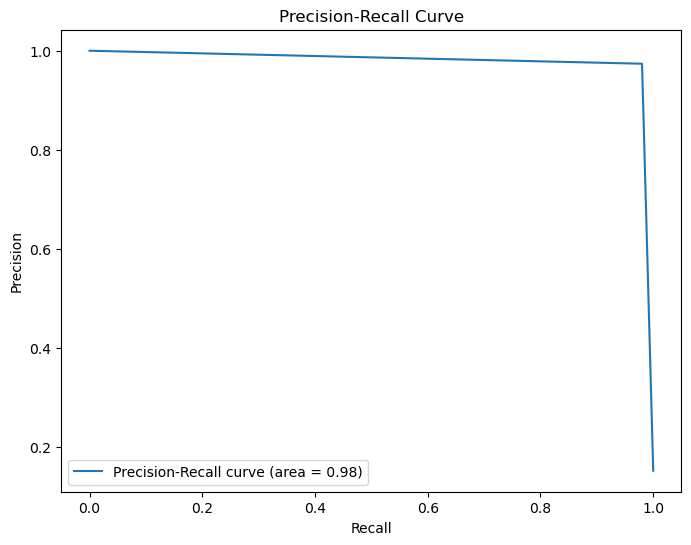

In [52]:
knn.fit(X_over_sampled_train, y_over_sampled_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### SMOTE Data

Accuracy:	0.993
Precision:	0.9930238149125136
Recall:		0.993
F1-Score:	0.993
Average Precision Score: 0.9580094312605189
Balanced Accuracy Score: 0.9873067429781692
Matthews Correlation Coefficient (MCC): 0.9730241187081415
AUC : 0.98731


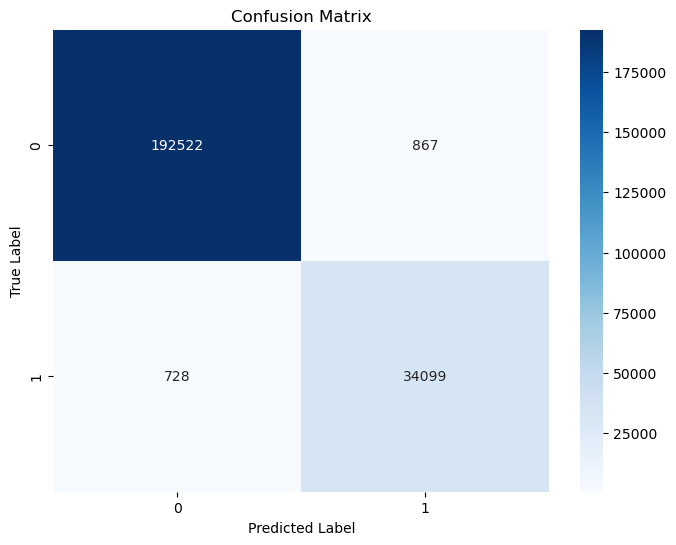

True Positives (TP): 34099
True Negatives (TN): 192522
False Positives (FP): 867
False Negatives (FN): 728


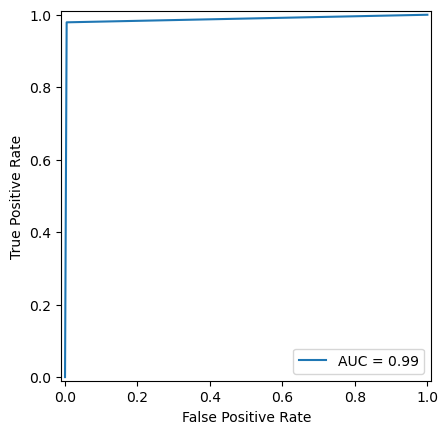

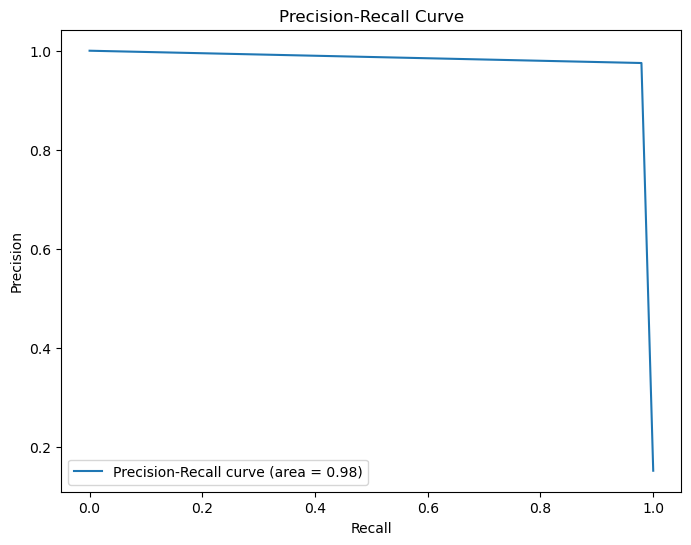

In [53]:
knn.fit(X_smote_train, y_smote_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### ADASYN Data

Accuracy:	0.993
Precision:	0.9929473255767315
Recall:		0.993
F1-Score:	0.993
Average Precision Score: 0.9573462709717098
Balanced Accuracy Score: 0.9877258823220931
Matthews Correlation Coefficient (MCC): 0.9727231348026475
AUC : 0.98773


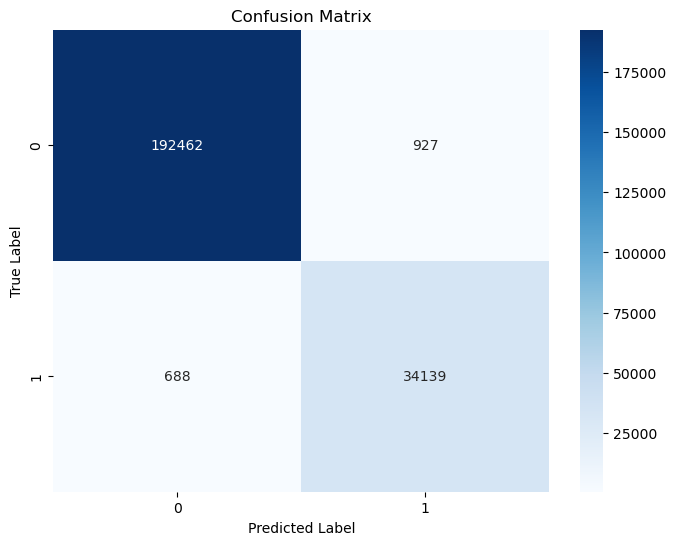

True Positives (TP): 34139
True Negatives (TN): 192462
False Positives (FP): 927
False Negatives (FN): 688


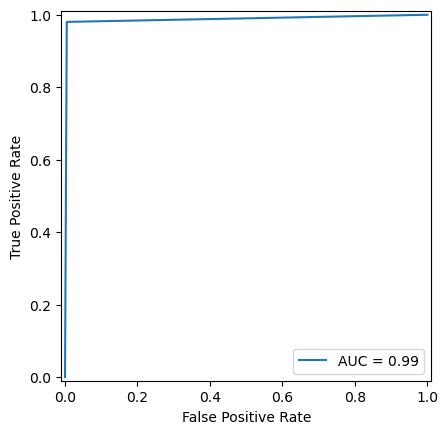

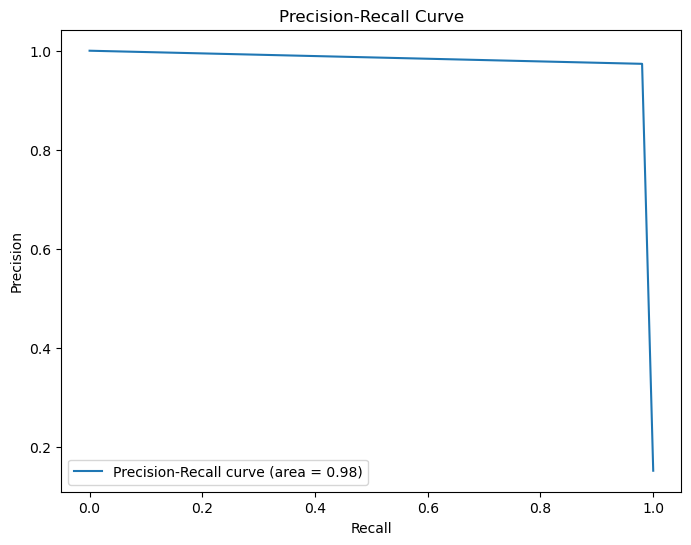

In [54]:
knn.fit(X_adasyn_train, y_adasyn_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)